# Cluster Analysis for Indonesian Demographic

In [ ]:
# import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# web scrapping
import requests
from bs4 import BeautifulSoup

## Web Scraping
Extracting Data From HTML Websites for Digging Information from https://id.wikipedia.org/wiki/Demografi_Indonesia 

In [ ]:
# create request to a website
websiteUrl = requests.get('https://id.wikipedia.org/wiki/Demografi_Indonesia').text
soup = BeautifulSoup(websiteUrl, 'lxml')

# extract table with class 'wikitable sortable'
tables = soup.find('table',{'class':'wikitable sortable'})

# find data with tag 'td'
lists = tables.findAll('td')

Create Empty List and entry data based HTML Pattern 

and then save as dataframe table

In [ ]:
# create empty lists  
bps = []
nama = []
ibukota = []
populasi = []
luas = []
pulau = []

# entering the data into empty list based HTML pattern
for i, i_list in enumerate(lists):
  if i in range(0, len(lists), 9):
  	bps.append(i_list.get_text())
  if i in range(2, len(lists), 9):
  	nama.append(i_list.get_text())
  if i in range(4, len(lists), 9):
  	ibukota.append(i_list.get_text())
  if i in range(5, len(lists), 9):
  	populasi.append(i_list.get_text())
  if i in range(6, len(lists), 9):
  	luas.append(i_list.get_text())
  if i in range(8, len(lists), 9):
  	pulau.append(i_list.get_text()[:-1])
   
# create datatframe table and insert into CSV
df = pd.DataFrame()
df['Kode BPS'] = bps
df['Nama'] = nama
df['Ibu Kota'] = ibukota
df['Populasi'] = populasi
df['Luas km'] = luas
df['Pulau'] = pulau

## Exploratory Data Analytics
Stage for Inspecting Data 

View Data Content by top rows

In [ ]:
# view 10 top rows using head()
df.head(10)

,Kode BPS,Nama,Ibu Kota,Populasi,Luas km,Pulau
0,11,Aceh,Banda Aceh,4.494.410,"56.500,51",Sumatra
1,12,Sumatra Utara,Medan,12.982.204,"72.427,81",Sumatra
2,13,Sumatra Barat,Padang,4.846.909,"42.224,65",Sumatra
3,14,Riau,Pekanbaru,5.538.367,"87.844,23",Sumatra
4,15,Jambi,Jambi,3.092.265,"45.348,49",Sumatra
5,16,Sumatra Selatan,Palembang,7.450.394,"60.302,54",Sumatra
6,17,Bengkulu,Bengkulu,1.715.518,"19.795,15",Sumatra
7,18,Lampung,Bandar Lampung,7.608.405,"37.735,15",Sumatra
8,19,Kepulauan Bangka Belitung,Pangkal Pinang,1.223.296,"16.424,14",Sumatra
9,21,Kepulauan Riau,Tanjung Pinang,1.679.163,"8.084,01",Sumatra


Checking Data info about data type and checking null values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kode BPS  34 non-null     object
 1   Nama      34 non-null     object
 2   Ibu Kota  34 non-null     object
 3   Populasi  34 non-null     object
 4   Luas km   34 non-null     object
 5   Pulau     34 non-null     object
dtypes: object(6)
memory usage: 1.7+ KB


it's show the data already no have null values

and then check how many rows and column

In [ ]:
print(f'{df.shape[0]} rows and {df.shape[1]} columns') 

34 rows and 6 columns


Changing object data type into numeric like population and large of its area (Luas km) so it must be changed to be 
- int goes for population 
- float for Luas KM because there are many commas (,) for each value that is represented as decimal

In [ ]:
# populasi object to int64
df['Populasi'] = df['Populasi'].str.replace('.', '')
df['Populasi'] = df['Populasi'].astype(int)
# luas km object to float64
df['Luas km'] = df['Luas km'].str.replace('.', '')
df['Luas km'] = df['Luas km'].str.replace(',', '.')
df['Luas km'] = df['Luas km'].astype(float)

showing result after column data type convertion

In [ ]:
df.head(10)

,Kode BPS,Nama,Ibu Kota,Populasi,Luas km,Pulau
0,11,Aceh,Banda Aceh,4494410,56500.51,Sumatra
1,12,Sumatra Utara,Medan,12982204,72427.81,Sumatra
2,13,Sumatra Barat,Padang,4846909,42224.65,Sumatra
3,14,Riau,Pekanbaru,5538367,87844.23,Sumatra
4,15,Jambi,Jambi,3092265,45348.49,Sumatra
5,16,Sumatra Selatan,Palembang,7450394,60302.54,Sumatra
6,17,Bengkulu,Bengkulu,1715518,19795.15,Sumatra
7,18,Lampung,Bandar Lampung,7608405,37735.15,Sumatra
8,19,Kepulauan Bangka Belitung,Pangkal Pinang,1223296,16424.14,Sumatra
9,21,Kepulauan Riau,Tanjung Pinang,1679163,8084.01,Sumatra


checking data type again through `info()` method

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Kode BPS  34 non-null     object 
 1   Nama      34 non-null     object 
 2   Ibu Kota  34 non-null     object 
 3   Populasi  34 non-null     int64  
 4   Luas km   34 non-null     float64
 5   Pulau     34 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ KB


look after describe for numeric (defaultly)

In [ ]:
df.describe()

,Populasi,Luas km
count,3.400000e+01,34.000000
mean,7.011161e+06,56810.982353
std,1.019484e+07,62210.881956
min,7.381630e+05,740.290000
25%,1.839661e+06,17517.590000
50%,3.589880e+06,41092.320000
75%,6.972387e+06,66143.007500
max,4.305373e+07,309934.400000


and viewing object variable describe using `include=[object]` parameter 

In [ ]:
df.describe(include=[object])

,Kode BPS,Nama,Ibu Kota,Pulau
count,34,34,34,34
unique,34,34,34,7
top,71,Sumatra Utara,Surabaya,Sumatra
freq,1,1,1,10


### Numerical Data Exploration
Exploring Numerical Feature

Plotting Numerical Columns using Boxplot

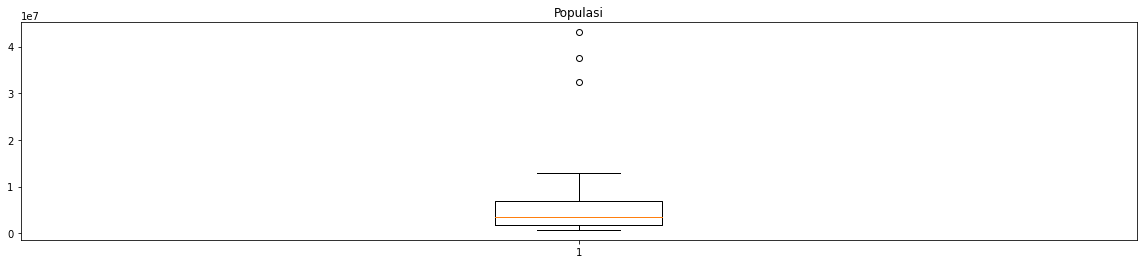

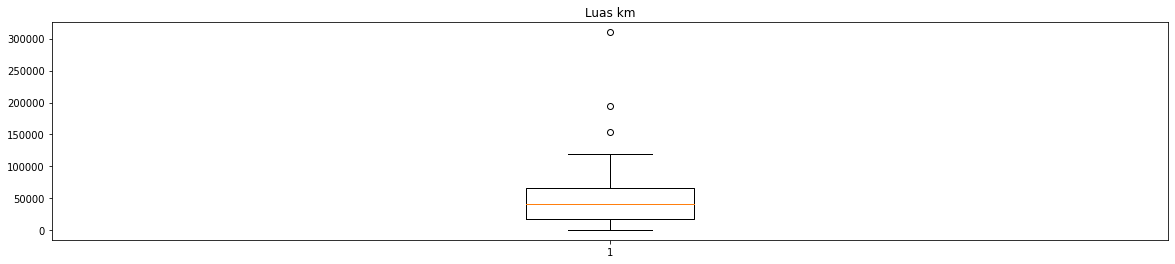

In [ ]:
# identifying for numeric columns outlier using boxplot
for i in df_num.columns:
    plt.figure(figsize=(20, 4))
    plt.boxplot(df_num[i])
    plt.title(i)
    plt.show()

Plotting Numerical Columns using Histogram through Distribution

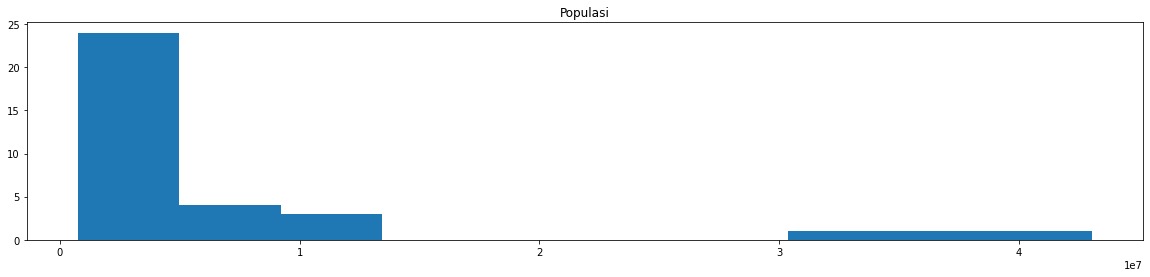

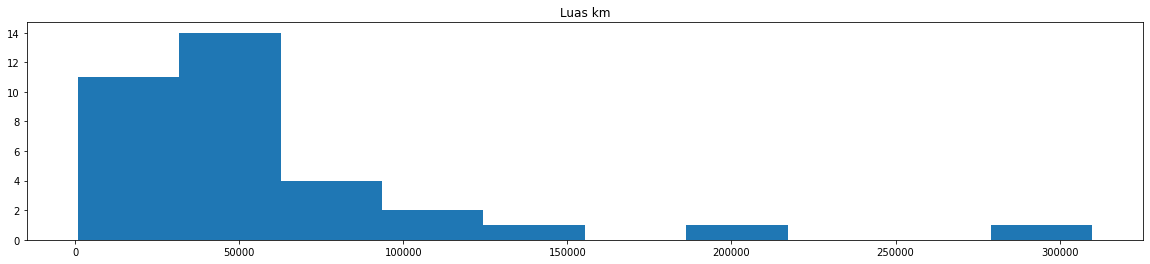

In [ ]:
# identifying for numeric columns outlier using distribution histogram plot
for i in df_num.columns:
    plt.figure(figsize=(20, 4))
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Plotting Numerical Columns using Scatter Plot

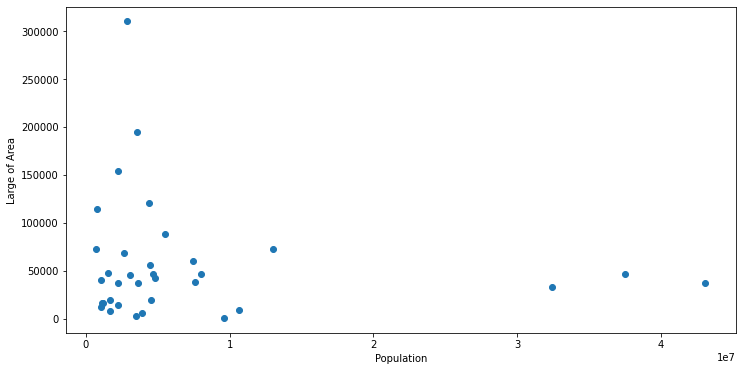

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['Populasi'], df['Luas km'])
ax.set_xlabel('Population')
ax.set_ylabel('Large of Area')
plt.show()

### Categorical Data Exploration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


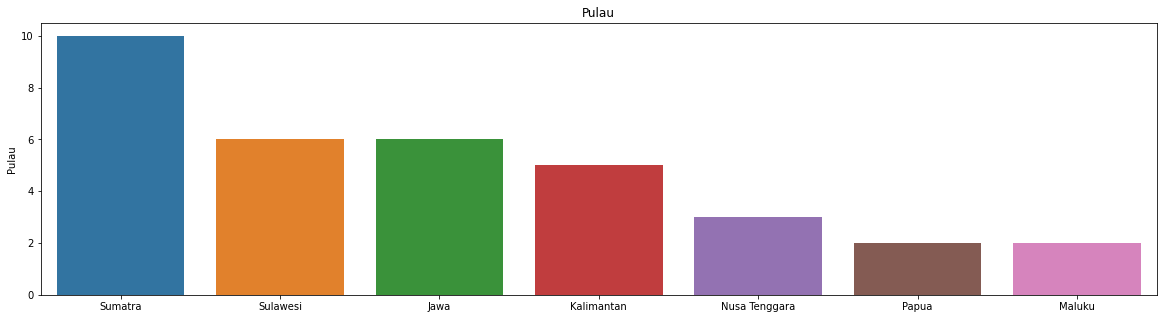

In [ ]:
# Menyiapkan kolom kategorikal  
# df_cat = df[['Nama','Ibu Kota','Pulau']]

plt.figure(figsize=(20,5))
sns.barplot(df['Pulau'].value_counts().index,df['Pulau'].value_counts()).set_title('Pulau')
plt.show()

## Data Preprocessing

### Numerical Column Standardization
Standardize Numerical Column with StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler  

# numeric columns
num_col = ['Populasi', 'Luas km']

# Standardization  
df_std = StandardScaler().fit_transform(df[num_col])  

# Membuat DataFrame  
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[num_col].columns)  
df_std.head()

,Populasi,Luas km
0,-0.250578,-0.005066
1,0.594501,0.254806
2,-0.215482,-0.237992
3,-0.146637,0.506341
4,-0.390181,-0.187023


### Categorical Column Encoding
categorical column encoding with Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
  
# Inisiasi nama kolom kategorikal  
kolom_kategorikal = ['Nama','Ibu Kota','Pulau'] 
  
# Membuat salinan data frame  
df_encode = df[kolom_kategorikal].copy()  
  
# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in kolom_kategorikal:  
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])
      
# Menampilkan data  
df_encode.head()

,Nama,Ibu Kota,Pulau
0,0,1,6
1,33,18,6
2,31,19,6
3,25,24,6
4,7,9,6


Combining both standardization numerical column and encoding categorical column after Preprocessed

In [ ]:
# combining dataframe with merging left join method
df_model= df_encode.merge(df_std, left_index = True, right_index=True, how= 'left')  
df_model.head()

,Nama,Ibu Kota,Pulau,Populasi,Luas km
0,0,1,6,-0.250578,-0.005066
1,33,18,6,0.594501,0.254806
2,31,19,6,-0.215482,-0.237992
3,25,24,6,-0.146637,0.506341
4,7,9,6,-0.390181,-0.187023


## Data Modelling
Unsupervised Learning Model with Kmean Clustering 

Because label to be predicted still unknown

### Find the best K
Using Elbow Method by iterating K and displaying result using Line Plot 

The best K located in a point when inertia value slowing own

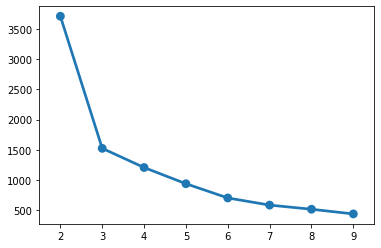

In [ ]:
from sklearn.cluster import KMeans

# Iterating to Acquire the best k   
cost = {}  
# elbow plot dengan jumlah cluster 2 sampai 9
for k in range(2,10):  
    cluster_model = KMeans(n_clusters = k, random_state = 75)
    cluster_model.fit_predict(df_model)  
    cost[k] = cluster_model.inertia_
   
# Memvisualisasikan Elbow Plot untuk menentukan jumlah cluster yang optimal
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

best k located in 6 where the inertia score slowing down

In [ ]:
cluster_model = KMeans(n_clusters = 6, random_state = 75)  
cluster_model = cluster_model.fit(df_model)  

clusters = cluster_model.predict(df_model)  
print('segmen populasi: {}\n'.format(clusters))    

segmen populasi: [0 1 1 1 0 1 0 3 5 5 0 0 2 2 2 2 0 4 4 5 5 3 5 5 4 1 4 4 0 4 3 5 4 4]



Inputing Cluster Column into Dataframe

In [ ]:
# Menggabungkan data awal dan segmen pelanggan    
df_final = df.copy()    
df_final['cluster'] = clusters
df_final

,Kode BPS,Nama,Ibu Kota,Populasi,Luas km,Pulau,cluster
0,11,Aceh,Banda Aceh,4494410,56500.51,Sumatra,0
1,12,Sumatra Utara,Medan,12982204,72427.81,Sumatra,1
2,13,Sumatra Barat,Padang,4846909,42224.65,Sumatra,1
3,14,Riau,Pekanbaru,5538367,87844.23,Sumatra,1
4,15,Jambi,Jambi,3092265,45348.49,Sumatra,0
5,16,Sumatra Selatan,Palembang,7450394,60302.54,Sumatra,1
6,17,Bengkulu,Bengkulu,1715518,19795.15,Sumatra,0
7,18,Lampung,Bandar Lampung,7608405,37735.15,Sumatra,3
8,19,Kepulauan Bangka Belitung,Pangkal Pinang,1223296,16424.14,Sumatra,5
9,21,Kepulauan Riau,Tanjung Pinang,1679163,8084.01,Sumatra,5


Checking Dataframe based on Cluster 0

In [ ]:
df_final[df_final['cluster'] == 0]

,Kode BPS,Nama,Ibu Kota,Populasi,Luas km,Pulau,cluster
0,11,Aceh,Banda Aceh,4494410,56500.51,Sumatra,0
4,15,Jambi,Jambi,3092265,45348.49,Sumatra,0
6,17,Bengkulu,Bengkulu,1715518,19795.15,Sumatra,0
10,31,Daerah Khusus Ibukota Jakarta,Jakarta Pusat,9607787,740.29,Jawa,0
11,32,Jawa Barat,Bandung,43053732,36925.05,Jawa,0
16,51,Bali,Denpasar,3890757,5449.37,Nusa Tenggara,0
28,75,Gorontalo,Gorontalo,1040164,12165.44,Sulawesi,0


Checking Dataframe based on Cluster 1

In [ ]:
df_final[df_final['cluster'] == 1]

,Kode BPS,Nama,Ibu Kota,Populasi,Luas km,Pulau,cluster
1,12,Sumatra Utara,Medan,12982204,72427.81,Sumatra,1
2,13,Sumatra Barat,Padang,4846909,42224.65,Sumatra,1
3,14,Riau,Pekanbaru,5538367,87844.23,Sumatra,1
5,16,Sumatra Selatan,Palembang,7450394,60302.54,Sumatra,1
25,72,Sulawesi Tengah,Palu,2635009,68089.83,Sulawesi,1


Checking Dataframe based on Cluster 2

In [ ]:
df_final[df_final['cluster'] == 2]

,Kode BPS,Nama,Ibu Kota,Populasi,Luas km,Pulau,cluster
12,33,Jawa Tengah,Semarang,32382657,32799.71,Jawa,2
13,34,Daerah Istimewa Yogyakarta,Yogyakarta,3457491,3133.15,Jawa,2
14,35,Jawa Timur,Surabaya,37476757,46689.64,Jawa,2
15,36,Banten,Serang,10632166,9018.64,Jawa,2


Checking Dataframe based on Cluster 3

In [ ]:
df_final[df_final['cluster'] == 3]

,Kode BPS,Nama,Ibu Kota,Populasi,Luas km,Pulau,cluster
7,18,Lampung,Bandar Lampung,7608405,37735.15,Sumatra,3
21,63,Kalimantan Selatan,Banjarmasin,3626616,37530.52,Kalimantan,3
30,81,Maluku,Ambon,1533506,47350.42,Maluku,3


Checking Dataframe based on Cluster 4

In [ ]:
df_final[df_final['cluster'] == 4]

,Kode BPS,Nama,Ibu Kota,Populasi,Luas km,Pulau,cluster
17,52,Nusa Tenggara Barat,Mataram,4500212,19708.79,Nusa Tenggara,4
18,53,Nusa Tenggara Timur,Kupang,4683827,46137.87,Nusa Tenggara,4
24,71,Sulawesi Utara,Manado,2270596,13930.73,Sulawesi,4
26,73,Sulawesi Selatan,Makassar,8034776,46116.45,Sulawesi,4
27,74,Sulawesi Tenggara,Kendari,2232586,36757.45,Sulawesi,4
29,76,Sulawesi Barat,Mamuju,1158651,16787.19,Sulawesi,4
32,91,Papua Barat,Manokwari,760422,114566.40,Papua,4
33,94,Papua,Jayapura,2833381,309934.40,Papua,4


Checking Dataframe based on Cluster 5

In [ ]:
df_final[df_final['cluster'] == 5]

,Kode BPS,Nama,Ibu Kota,Populasi,Luas km,Pulau,cluster
8,19,Kepulauan Bangka Belitung,Pangkal Pinang,1223296,16424.14,Sumatra,5
9,21,Kepulauan Riau,Tanjung Pinang,1679163,8084.01,Sumatra,5
19,61,Kalimantan Barat,Pontianak,4395983,120114.32,Kalimantan,5
20,62,Kalimantan Tengah,Palangkaraya,2212089,153564.50,Kalimantan,5
22,64,Kalimantan Timur,Samarinda,3553143,194849.08,Kalimantan,5
23,65,Kalimantan Utara,Tanjung Selor,738163,72567.49,Kalimantan,5
31,82,Maluku Utara,Sofifi,1038087,39959.99,Maluku,5


### Plotting Numerical Value based on Clusters
PLotting with Boxplot

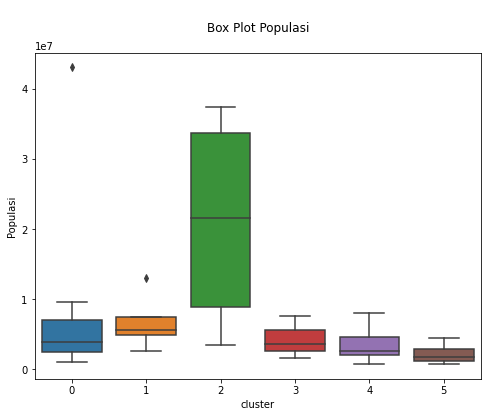

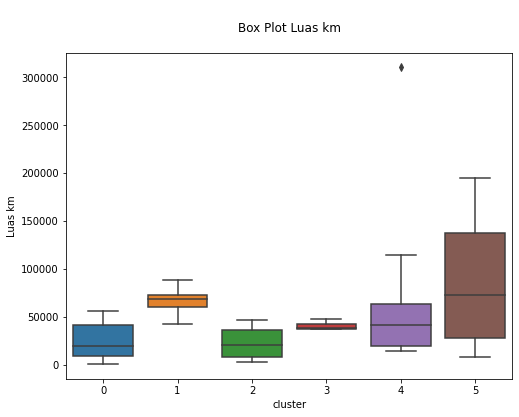

In [ ]:
import matplotlib.pyplot as plt
# Data Numerical
kolom_numerik = ['Populasi','Luas km']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(8,6))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show() 